In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data (just need 1 file)
nBodies = 3
dataFile = "/Users/brandonmanley/Documents/nBody/data/brutusSim/"+str(nBodies)+"body/brutus10_1_"+str(nBodies)+".csv"

dataCols = ["file", "eventID"]
perParticleColumnsInput = ["m", "x", "y", "dx", "dy"]
perParticleColumnsOutput = ["xf", "yf", "dxf", "dyf"]

for col in perParticleColumnsInput:
    for i in range(nBodies):
        dataCols.append(col+str(i+1))
dataCols.append("t")
for col in perParticleColumnsOutput:
    for i in range(nBodies):
        dataCols.append(col+str(i+1))
        
df = pd.read_csv(dataFile, index_col=False, names=dataCols)

with pd.option_context('mode.use_inf_as_null', True):
    df = df.dropna()

In [9]:
# energy conservation

def potentialEnergy(): # sets total potential energy  (using G =1)
    
    potEnergy = 0
    for n in range(1, nBodies+1):
        nthBody = str(n)

        for i in range(1, nBodies+1):
            if i <= n: continue
            mass_term = 0
            x_sep = 0
            y_sep = 0
            r_sep = 0
                
            mass_term = df['m'+nthBody]*df['m'+str(i)]
            x_sep = (df['xf'+nthBody] - df['xf'+str(i)])**2
            y_sep = (df['yf'+nthBody] - df['yf'+str(i)])**2
            r_sep = (x_sep + y_sep)**0.5
            potEnergy -= mass_term / r_sep

    df['u'] = potEnergy
    
def kineticEnergy(): # sets total kinetic energy 
    
    kinEnergy = 0
    for n in range(1, nBodies+1):
        nthBody = str(n)
        kv_term = 0
        
        kv_term = df['dxf'+nthBody]**2 + df['dyf'+nthBody]**2
        kinEnergy += 0.5*df['m'+nthBody]*kv_term
    
    df['k'] = kinEnergy

        
potentialEnergy()
kineticEnergy()
df['e'] = df['k'] + df['u']


def initialEnergy(): # sets initial energy 
    
    # kinetic
    kinEnergy = 0
    for n in range(1, nBodies+1):
        nthBody = str(n)
        kv_term = 0
        
        kv_term = df['dx'+nthBody]**2 + df['dy'+nthBody]**2
        kinEnergy += 0.5*df['m'+nthBody]*kv_term
    
    df['ik'] = kinEnergy
    
    # potential
    potEnergy = 0
    for n in range(1, nBodies+1):
        nthBody = str(n)

        for i in range(1, nBodies+1):
            if i <= n: continue
            mass_term = 0
            x_sep = 0
            y_sep = 0
            r_sep = 0
                
            mass_term = df['m'+nthBody]*df['m'+str(i)]
            x_sep = (df['x'+nthBody] - df['x'+str(i)])**2
            y_sep = (df['y'+nthBody] - df['y'+str(i)])**2
            r_sep = (x_sep + y_sep)**0.5
            potEnergy -= mass_term / r_sep

    df['iu'] = potEnergy
    
    df['ie'] = df['ik'] + df['iu']

initialEnergy() 

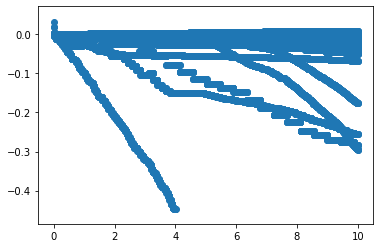

In [10]:
plt.scatter(df['t'], df['e']-df['ie'])
plt.show()

In [12]:
# momentum conservation

def momentum():
    mom_x = 0
    mom_y = 0
    mom = 0
    
    for n in range(1, nBodies+1):
        nthBody = str(n)
        x_term = 0
        y_term = 0
        
        x_term = df['m'+nthBody]*df['dxf'+nthBody]
        y_term = df['m'+nthBody]*df['dyf'+nthBody]
        
        mom_x += x_term
        mom_y += y_term
        mom += (x_term**2 + y_term**2)**0.5
    
    df['px'] = mom_x
    df['py'] = mom_y
    df['p']  = mom
        
momentum()

def initialMomentum():
    mom_x = 0
    mom_y = 0
    mom = 0
    
    for n in range(1, nBodies+1):
        nthBody = str(n)
        x_term = 0
        y_term = 0
        
        x_term = df['m'+nthBody]*df['dx'+nthBody]
        y_term = df['m'+nthBody]*df['dy'+nthBody]
        
        mom_x += x_term
        mom_y += y_term
        mom += (x_term**2 + y_term**2)**0.5
    
    df['ipx'] = mom_x
    df['ipy'] = mom_y
    df['ip']  = mom

initialMomentum()

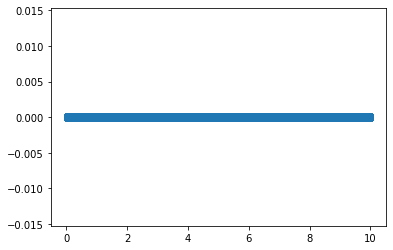

In [16]:
plt.scatter(df['t'], df['py']-df['ipy'])
plt.show()

In [ ]:
# center of mass conservation 

def center_of_mass():
    cm_x = 0
    cm_y = 0
    cm = 0
    
    for n in range(1, nBodies+1):
        ns = str(n)
        
        
    
    
    